## **Проект. Исследование объявлений о продаже квартир. **

### Описание проекта.
#### Предоставленные данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

### Цель проекта. 
#### Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

###### Проект подготовил Дмитрий Фролов.

### Шаг №1. Откройте файл с данными и изучите общую информацию.

In [ ]:
# Загружаем библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Загружаем данные.
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# Проверяем размер датасета.
data.shape

(23699, 22)

In [ ]:
# Выводим список столбцов и их типов данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
# Предварительный просмотр первых нескольких записей.
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

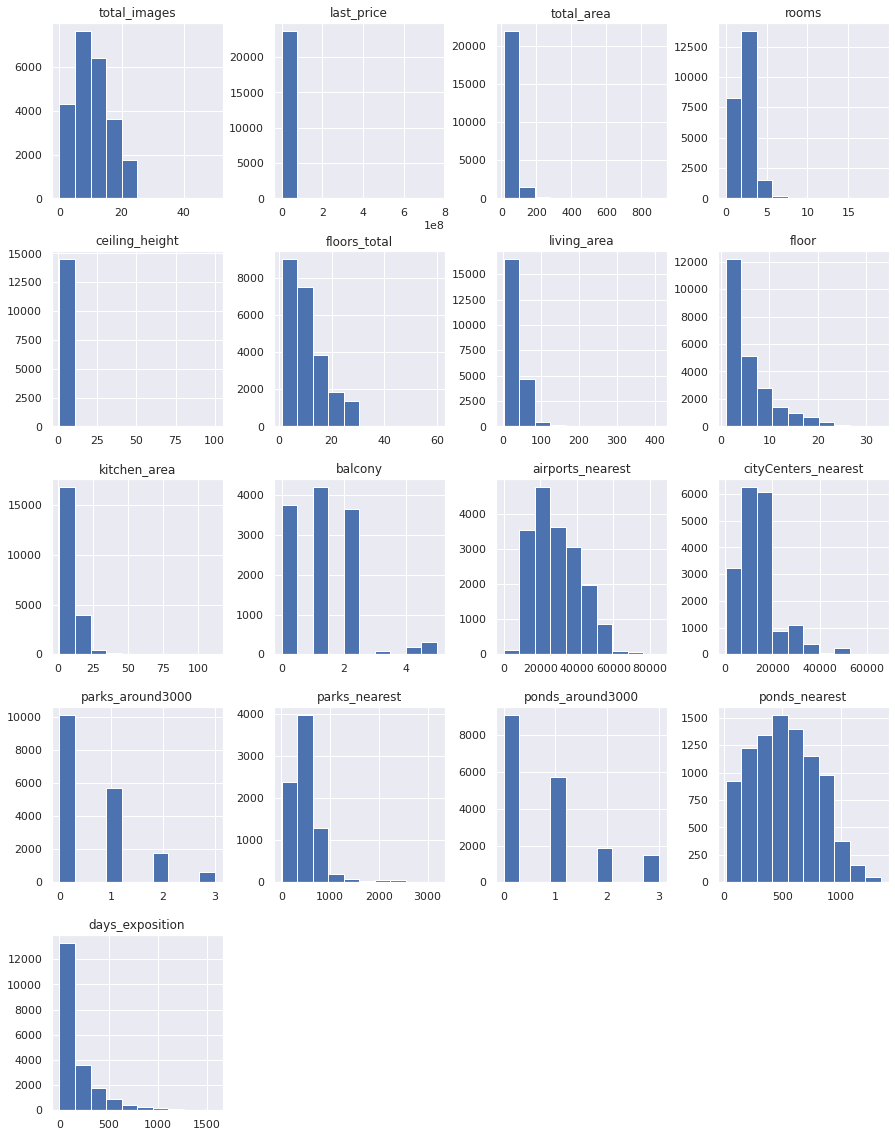

In [ ]:
# Построение общей гистограммы для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20))

In [ ]:
# сразу проверим датасет на наличие явных дубликатов, чтобы не обрабатывать заведомо некорректные данные.
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


### Шаг №2. Предобработка данных.

In [ ]:
# Определяем, есть ли пропущенные значения.
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Причины, которые могли привести к пропускам в данных и решения по пропущенным значениям.
* ceiling_height - 9195 пропущенных значений: не заменяем на 0, т.к. любое помещение должно иметь высоту, оставляем Null;
* floors_total - 86 пропущенных значений: не заменяем на 0, т.к. любой дом должен иметь этаж, удалем строки, содержащие Null;
* living_area - 1903 пропущенных значений: не заменяем на 0, т.к. любое помещение должно иметь жилищную площадь, оставляем Null; 
* is_apartment - 20924 пропущенных значений: принимает значение False -  булев тип данных, нет необходимости замены на 0,  заменяем на False;
* kitchen_area - 2278 пропущенных значений: если это не студия, оставляем Null;
* balcony - 11519 пропущенных значений: в квартире нет балкона, заменяем на 0;
* locality_name - 49 пропущенных значений:  не заполнены категориальные данные, удаляем строки с Null;
* airports_nearest - 5542 пропущенных значений: аэропорта рядом нет, оставляем Null;
* cityCenters_nearest - 5519 пропущенных значений: центра города рядом нет, оставляем Null;
* parks_around3000 - 5518 пропущенных значений: парков в радиусе 3 км нет, оставляем Null;
* parks_nearest - 15620 пропущенных значений: парков рядом нет, оставляем Null;
* ponds_around3000 - 5518 пропущенных значений: прудов в радиусе 3 км нет, оставляем Null;
* ponds_nearest - 14589 пропущенных значений: прудов рядом нет, оставляем Null;
* days_exposition - 3181 пропущенных значений: еще не завершена экспозиция, оставляем Null.

In [ ]:
#  заменяем пропущенные данные в столбце balcony на 0.
data['balcony'] = data['balcony'].fillna(0)

In [ ]:
# заменяем пропущенные данные в столбце is_apartment на False.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
# Удаляем строки с Null в столбцах floors_total, locality_name
data = data.dropna(subset=['floors_total','locality_name'])

In [ ]:
# проверяем, все ли изменилось при заменах и удалениях.
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

###Предложения по изменению типа данных и пояснения.
* last_price - произвел изменение с float64 на int. Причина - в ценах нет знаков после запятой.
* first_day_exposition - произвел изменение с object на datetime. Причина - приведение в формат даты.
* floors_total - произвел изменение с float64 на int. Причина - этажи не могут быть дробными.
* is_apartment - произвел изменение с object на bool. Причина - логический тип данных.
* balcony - произвел изменение с float64 на int. Причина - балкон не может принимать дробное значение.
* days_exposition - произвел изменение с float64 на int. Причина - счет экспозиции идет в целых днях.

In [ ]:
# приводим отобранные столбцы к целевым типам данных методами astype и pd.to_datetime и выводим список столбцов и типов данных методом info.
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].apply('int64')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [ ]:
# получаем набор всех уникальных значений в столбце locality_name методом unique.
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
 # посчитаем количество уникальных значений в столбце 'locality_name' методом nunique.
 data['locality_name'].nunique()

364

###Изучение списка уникальных значений в названии населенного пункта locality_name привело к выводу, что кандидатами по признаку "неявный дуплакат" являются:
1. названия населенных пунктов, где в одном случае название пишется через 'ё', а в другом случае пишется через 'е' по сути для аналогичных населенных пунктов;
2. названия населенных пунктов, где в одном случае название пишется как "городской поселок", а в другом случае как 'поселок городского типа' - также для идентичного населенного пункта.

In [ ]:
# приведем названия населенных пунктов к нижнему регистру методом str.lower().
data['locality_name'].str.lower()

0            санкт-петербург
1             посёлок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23565, dtype: object

In [ ]:
# заменяем 'ё'  на 'е' методом str.replace.
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].nunique()

330

In [ ]:
# заменяем 'городской поселок'  на 'поселок городского типа' методом str.replace.
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'].nunique()

323

В результате замен неявных дубликатов количество уникальных значений уменьшилось с 364 до 323 или на 41 название.

### Нахождение и устранение редких и выбивающихся значений.

In [ ]:
# Изучаем статистические показатели, пользуясь методом  describe(). 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,2.356500e+04
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,-1.241134e+18
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,3.147609e+18
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,-9.223372e+18
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,2.200000e+01
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,7.300000e+01
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,1.980000e+02
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1.580000e+03


### Нахождение выбросов и их удаление для столбца "Высота потолка" -  'ceiling_height'
* В столбце высота потолков - ceiling_height видим максимальное значение 
потолка 100 метров, это в 36,08 раз больше среднего значения в данном столбце.
* Медианное значение 2.65 метра чуть ниже среднего арифметического 2.77 метра.
* 25% высот потолков были ниже высоты 2.51 метра.
* 75% высот потолков были ниже высоты 2.80 метра.

Далее предлагаю визуализировать распределение с помощью диаграммы "ящик с усами" и гистограммы.

<AxesSubplot:xlabel='ceiling_height'>

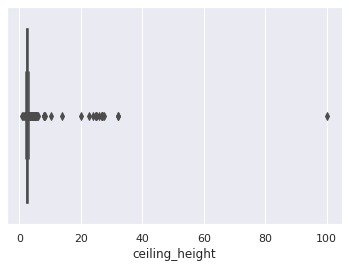

In [ ]:
# Cтроим диаграмму 'ящик с усами' для столбца "высота потолка" - ceiling_height.
sns.boxplot(data['ceiling_height'])

* Для определения выбросов в столбце "высота потолка" - ceiling_height применим подход с использованием межквартильного размаха (IQR).
* IQR можно представить как разброс основной части данных, где выбросы - это отдаленные от основной части данных данные.
* Выбросы определяются как любое значение, которое на 1.5хIQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля. 

In [ ]:
# вычисляем границы выбросов - 1.5*IQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля. 
# вычисляем значение 1-го квартиля
Q1 = data['ceiling_height'].quantile(q=.25)
# вычисляем значение 3-го квартиля
Q3 = data['ceiling_height'].quantile(q=.75)
# вычиcляем межквартильный размах
IQR = Q3 - Q1
print('Нижняя граница "1-ый квартиль - 1,5 * IQR" = ', (Q1-1.5*IQR).round(2))
print('Верхняя граница "3-ий квартиль + 1,5 * IQR" = ', (Q3+1.5*IQR).round(2))

Нижняя граница "1-ый квартиль - 1,5 * IQR" =  2.07
Верхняя граница "3-ий квартиль + 1,5 * IQR" =  3.24


In [ ]:
# считаем количество выбросов в каждой категории выбросов. 
print('Выбросы, находящиеся ниже нижней границы высоты потолка = ', data.query('ceiling_height < 2.07')['ceiling_height'].count())
print('Выбросы, находящиеся выше верхней границы высоты потолка = ', data.query('ceiling_height > 3.24')['ceiling_height'].count())

Выбросы, находящиеся ниже нижней границы высоты потолка =  14
Выбросы, находящиеся выше верхней границы высоты потолка =  801


In [ ]:
# удаляем выбросы.
data.drop(index=data.query('ceiling_height < 2.07').index,inplace=True)
data.drop(index=data.query('ceiling_height > 3.24').index,inplace=True)

<AxesSubplot:xlabel='ceiling_height'>

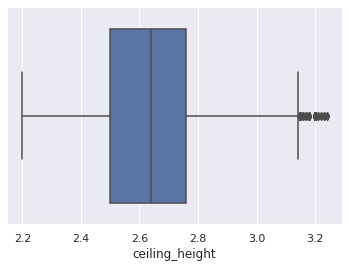

In [ ]:
# Cтроим диаграмму 'ящик с усами'
sns.boxplot(data['ceiling_height'])

In [ ]:
# проверяем описательную статистику по столбцу "высота потолка" - 'ceiling_height'
data['ceiling_height'].describe()

count    13666.000000
mean         2.680236
std          0.184634
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.240000
Name: ceiling_height, dtype: float64

<AxesSubplot:xlabel='ceiling_height'>

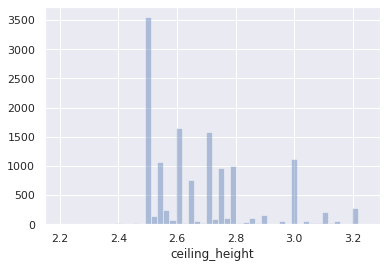

In [ ]:
# гистограмма распределения высот потолка.
sns.distplot( a=data["ceiling_height"], bins =50, hist=True, kde=False, rug=False )

### Нахождение выбросов и их удаление для столбца "Последняя стоимость" -  'last_price'
* В столбце последняя цена - last_price видим максимальное значение 
цены 763000000 руб, это в 116,67 раз больше среднего значения в данном столбце.
* Медианное значение стоимости квартиры = 4550000 руб. и меньше среднего арифметического 6097101 руб. в 1,34 раза.
* 25% стоимости за квартиру ниже стоимости 3400000 руб.
* 75% стоимости за квартиру ниже стоимости 6500000 руб.

Далее предлагаю визуализировать распределение с помощью диаграммы "ящик с усами" и гистограммы.

In [ ]:
# описательная статистика для последней цены (перед удалением выбросов).
data['last_price'].describe()

count    2.275000e+04
mean     6.097101e+06
std      9.251629e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:xlabel='last_price'>

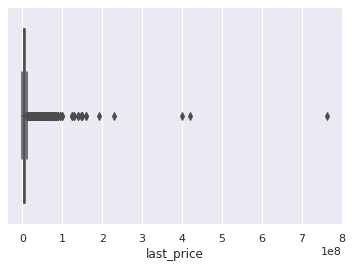

In [ ]:
# Cтроим диаграмму 'ящик с усами' для столбца "последняя цена" - last_price.
sns.boxplot(data['last_price'])

In [ ]:
# вычисляем границы выбросов - 1.5*IQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля для 
# вычисляем значение 1-го квартиля
Q1 = data['last_price'].quantile(q=.25)
# вычисляем значение 3-го квартиля
Q3 = data['last_price'].quantile(q=.75)
# вычиcляем межквартильный размах
IQR = Q3 - Q1
print('Нижняя граница "1-ый квартиль - 1,5 * IQR" = ', (Q1-1.5*IQR).round(2))
print('Верхняя граница "3-ий квартиль + 1,5 * IQR" = ', (Q3+1.5*IQR).round(2))

Нижняя граница "1-ый квартиль - 1,5 * IQR" =  -1250000.0
Верхняя граница "3-ий квартиль + 1,5 * IQR" =  11150000.0


#### Поскольку нижняя граница для цены оказалась отрицательной, предложу установить границу минимальной цены в 350000 рублей - мониторинг сайта Яндекс Недвижимость показал что есть квартира за 350 000 рублей в Ленинградской области - https://realty.ya.ru/offer/3154273186093258112/#location

In [ ]:
# считаем количество выбросов в каждой категории выбросов. 
print('Выбросы, находящиеся ниже нижней границы цены = ', data.query('last_price < 350000')['last_price'].count())
print('Выбросы, находящиеся выше верхней границы цены = ', data.query('last_price > 11150000')['last_price'].count())

Выбросы, находящиеся ниже нижней границы цены =  1
Выбросы, находящиеся выше верхней границы цены =  1862


In [ ]:
# удаляем выбросы.
data.drop(index=data.query('last_price <= 350000').index,inplace=True)
data.drop(index=data.query('last_price > 11150000').index,inplace=True)

<AxesSubplot:xlabel='last_price'>

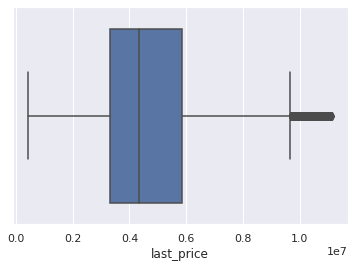

In [ ]:
# Cтроим диаграмму 'ящик с усами'
sns.boxplot(data['last_price'])

In [ ]:
# проверяем описательную статистику по столбцу "последняя цена" - 'last_price' после удаления выбросов.
data['last_price'].describe()

count    2.088700e+04
mean     4.725225e+06
std      2.094368e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.350000e+06
75%      5.850000e+06
max      1.115000e+07
Name: last_price, dtype: float64

<AxesSubplot:xlabel='last_price'>

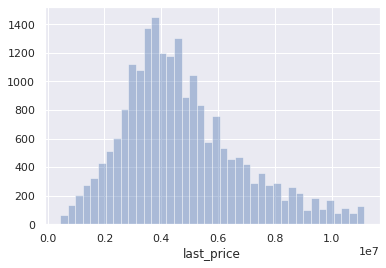

In [ ]:
# гистограмма распределения цен.
sns.distplot( a=data["last_price"], bins=40, hist=True, kde=False, rug=False )

###Нахождение выбросов и их удаление для столбца "Общая площадь" - 'total_area'
* В столбце общая площадь - total_area видим максимальное значение площади 900 метров, это в 15,41 раза больше среднего значения в данном столбце 58,42 кв.метра.
* Медианное значение общей площади квартиры = 51 кв.м. и меньше среднего арифметического 58,42 кв.м. в 1,15 раза.
* 25% общей площади ниже общей площади в 40 кв.м.
* 75% общей площади ниже общей площади в 67,80 кв.м.
* Далее предлагаю визуализировать распределение с помощью диаграммы "ящик с усами" и гистограммы.

In [ ]:
# описательная статистика по столбцу 'total_area' до исключения выбросов.
data['total_area'].describe()

count    20887.000000
mean        52.482779
std         18.259244
min         12.000000
25%         38.900000
50%         48.500000
75%         62.540000
max        230.000000
Name: total_area, dtype: float64

<AxesSubplot:xlabel='total_area'>

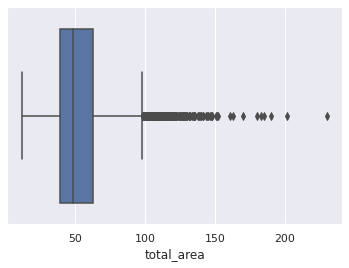

In [ ]:
# Cтроим диаграмму 'ящик с усами' для столбца "общая площадь" - total_area.
sns.boxplot(data['total_area'])

<AxesSubplot:xlabel='total_area'>

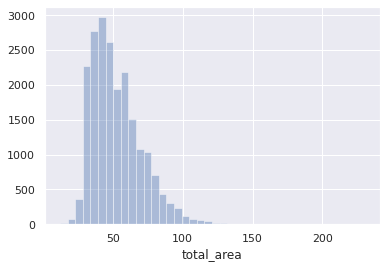

In [ ]:
# Гистограмма распределения 'total_area'.
sns.distplot( a=data["total_area"], bins =40, hist=True, kde=False, rug=False )

In [ ]:
# вычисляем границы выбросов - 1.5*IQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля для 
# вычисляем значение 1-го квартиля
Q1 = data['total_area'].quantile(q=.25)
# вычисляем значение 3-го квартиля
Q3 = data['total_area'].quantile(q=.75)
# вычиcляем межквартильный размах
IQR = Q3 - Q1
print('Нижняя граница "1-ый квартиль - 1,5 * IQR" = ', (Q1-1.5*IQR).round(2))
print('Верхняя граница "3-ий квартиль + 1,5 * IQR" = ', (Q3+1.5*IQR).round(2))

Нижняя граница "1-ый квартиль - 1,5 * IQR" =  3.44
Верхняя граница "3-ий квартиль + 1,5 * IQR" =  98.0


### Нижнюю границу определим по минимальному значению в столбце общей площади.

In [ ]:
# считаем количество выбросов в каждой категории выбросов. 
print('Выбросы, находящиеся ниже нижней границы общей площади = ', data.query('total_area <= 12')['total_area'].count())
print('Выбросы, находящиеся выше верхней границы общей площади = ', data.query('total_area > 98')['total_area'].count())

Выбросы, находящиеся ниже нижней границы общей площади =  1
Выбросы, находящиеся выше верхней границы общей площади =  397


In [ ]:
# удаляем выбросы.
data.drop(index=data.query('total_area <= 12').index,inplace=True)
data.drop(index=data.query('total_area > 98').index,inplace=True)

<AxesSubplot:xlabel='total_area'>

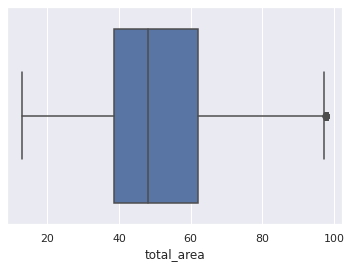

In [ ]:
# Cтроим диаграмму 'ящик с усами'
sns.boxplot(data['total_area'])

In [ ]:
# проверяем описательную статистику по столбцу "общая площадь" - 'total_area' после удаления выбросов.
data['total_area'].describe()

count    20489.000000
mean        51.313505
std         16.200196
min         13.000000
25%         38.500000
50%         48.000000
75%         62.000000
max         98.000000
Name: total_area, dtype: float64

###Нахождение выбросов и их удаление для столбца "Жилищная площадь" - 'living_area'
* В столбце общая площадь - living_area видим максимальное значение площади 90 кв.м., это в 2,95 раза больше среднего значения в данном столбце 30,48 кв.метра.
* Медианное значение жилищной площади квартиры = 29.40 кв.м. и меньше не намного среднего арифметического 30.48 кв.м.
* 25% жилищной площади ниже жилищной площади в 18.10 кв.м.
* 75% жилищной площади ниже жилищной площади в 39,60 кв.м.
* Далее предлагаю визуализировать распределение с помощью диаграммы "ящик с усами" и гистограммы.

In [ ]:
# описательная статистика по столбцу 'living_area' до исключения выбросов.
data['living_area'].describe()

count    18909.000000
mean        29.329153
std         11.830730
min          2.000000
25%         18.000000
50%         28.700000
75%         38.000000
max         80.000000
Name: living_area, dtype: float64

<AxesSubplot:xlabel='living_area'>

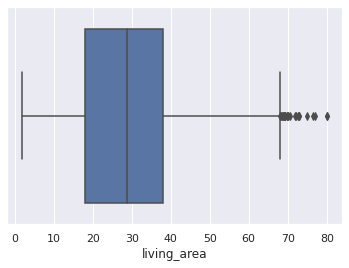

In [ ]:
# Cтроим диаграмму 'ящик с усами' для столбца "жилищная площадь" - living_area.
sns.boxplot(data['living_area'])

<AxesSubplot:xlabel='living_area'>

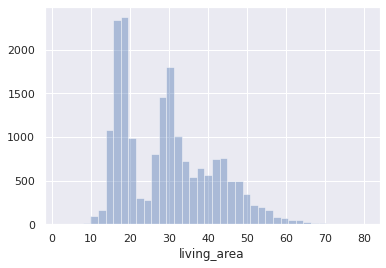

In [ ]:
# Гистограмма распределения 'living_area'
sns.distplot( a=data["living_area"], bins= 40, hist=True, kde=False, rug=False)

In [ ]:
# вычисляем границы выбросов - 1.5*IQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля для 
# вычисляем значение 1-го квартиля
Q1 = data['living_area'].quantile(q=.25)
# вычисляем значение 3-го квартиля
Q3 = data['living_area'].quantile(q=.75)
# вычиcляем межквартильный размах
IQR = Q3 - Q1
print('Нижняя граница "1-ый квартиль - 1,5 * IQR" = ', (Q1-1.5*IQR).round(2))
print('Верхняя граница "3-ий квартиль + 1,5 * IQR" = ', (Q3+1.5*IQR).round(2))

Нижняя граница "1-ый квартиль - 1,5 * IQR" =  -12.0
Верхняя граница "3-ий квартиль + 1,5 * IQR" =  68.0


### Нижнюю границу определим не по отрицательному значению нижней границы, а по минимальному значению учетной нормы 1. Учетная норма площади жилого помещения на одного человека в Санкт-Петербурге составляет: 9 квадратных метров общей площади жилого помещения для проживающих в отдельных квартирах и жилых домах;
https://www.assembly.spb.ru/ndoc/doc/0/8414031?print=0

In [ ]:
# считаем количество выбросов в каждой категории выбросов. 
print('Выбросы, находящиеся ниже нижней границы жилой площади = ', data.query('living_area <= 9')['living_area'].count())
print('Выбросы, находящиеся выше верхней границы жилой площади = ', data.query('living_area > 68')['living_area'].count())

Выбросы, находящиеся ниже нижней границы жилой площади =  21
Выбросы, находящиеся выше верхней границы жилой площади =  26


In [ ]:
# удаляем выбросы.
data.drop(index=data.query('living_area < 9').index,inplace=True)
data.drop(index=data.query('living_area > 68').index,inplace=True)

<AxesSubplot:xlabel='total_area'>

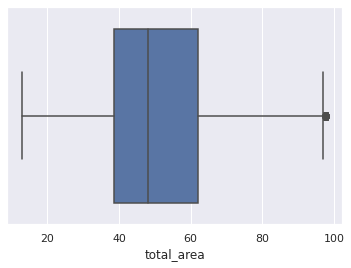

In [ ]:
# Cтроим диаграмму 'ящик с усами'
sns.boxplot(data['total_area'])

In [ ]:
# проверяем описательную статистику по столбцу "жилищная площадь" - 'living_area' после удаления выбросов.
data['living_area'].describe()

count    18870.000000
mean        29.287041
std         11.722420
min          9.000000
25%         18.000000
50%         28.700000
75%         38.000000
max         68.000000
Name: living_area, dtype: float64

###Нахождение выбросов и их удаление для столбца "Площадь кухни" - 'kitchen_area'
* В столбце площадь кухни - kitchen_area видим максимальное значение площади 55.70 кв.м., это в 5,70 раза больше среднего значения в данном столбце 9,77 кв.метра.
* Медианное значение кухонной площади = 9.00 кв.м. и меньше не намного среднего арифметического 9.77 кв.м.
* 25% кухонной площади ниже кухонной площади в 7.00 кв.м.
* 75% жилищной площади ниже жилищной площади в 11,00 кв.м.
* Далее предлагаю визуализировать распределение с помощью диаграммы "ящик с усами" и гистограммы.

In [ ]:
# описательная статистика по столбцу 'kitchen_area' до исключения выбросов.
data['kitchen_area'].describe()

count    18516.000000
mean         9.391791
std          3.554025
min          1.300000
25%          7.000000
50%          8.900000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area'>

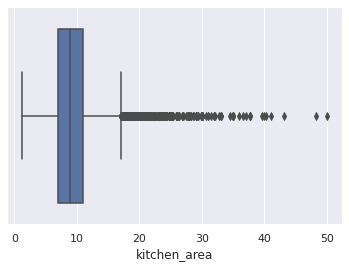

In [ ]:
# Cтроим диаграмму 'ящик с усами' для столбца "площадь кухни" - kitchen_area.
sns.boxplot(data['kitchen_area'])

<AxesSubplot:xlabel='kitchen_area'>

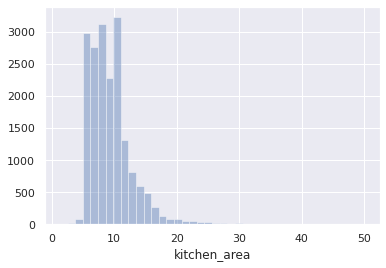

In [ ]:
# Гистограмма ниже показывает распределение 'kitchen_area'
sns.distplot( a=data["kitchen_area"], bins=40, hist=True, kde=False, rug=False )

In [ ]:
# вычисляем границы выбросов - 1.5*IQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля для 
# вычисляем значение 1-го квартиля
Q1 = data['kitchen_area'].quantile(q=.25)
# вычисляем значение 3-го квартиля
Q3 = data['kitchen_area'].quantile(q=.75)
# вычиcляем межквартильный размах
IQR = Q3 - Q1
print('Нижняя граница "1-ый квартиль - 1,5 * IQR" = ', (Q1-1.5*IQR).round(2))
print('Верхняя граница "3-ий квартиль + 3 * IQR" = ', (Q3+3*IQR).round(2))

Нижняя граница "1-ый квартиль - 1,5 * IQR" =  1.0
Верхняя граница "3-ий квартиль + 3 * IQR" =  23.0


### предлагаю минимальную плопщадь кухни установить на уровне 3 кв.м.
### границу максимальной площади посчитать как Q3+3*IQR (коэффициент к межквартильному размаху использовать не 1,5, а 3), то есть будет 23 кв.м.

In [ ]:
# считаем количество выбросов в каждой категории выбросов. 
print('Выбросы, находящиеся ниже нижней границы площади кухни = ', data.query('kitchen_area <= 3')['kitchen_area'].count())
print('Выбросы, находящиеся выше верхней границы площади кухни = ', data.query('kitchen_area > 23')['kitchen_area'].count())

Выбросы, находящиеся ниже нижней границы площади кухни =  18
Выбросы, находящиеся выше верхней границы площади кухни =  165


In [ ]:
# удаляем выбросы.
data.drop(index=data.query('kitchen_area <= 3').index,inplace=True)
data.drop(index=data.query('kitchen_area > 23').index,inplace=True)

<AxesSubplot:xlabel='kitchen_area'>

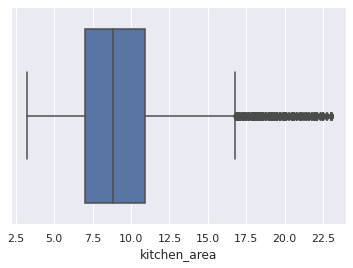

In [ ]:
# Cтроим диаграмму 'ящик с усами'
sns.boxplot(data['kitchen_area'])

In [ ]:
# проверяем описательную статистику по столбцу "площадь кухни" - 'kitchen_area' после удаления выбросов.
data['kitchen_area'].describe()

count    18333.000000
mean         9.232230
std          3.065515
min          3.200000
25%          7.000000
50%          8.800000
75%         10.900000
max         23.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:xlabel='kitchen_area'>

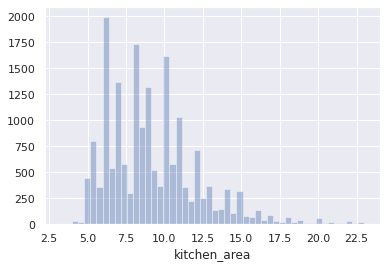

In [ ]:
# Строим гистограмму для 'kitchen_area'.
sns.distplot( a=data["kitchen_area"], hist=True, kde=False, rug=False )

###Нахождение выбросов и их удаление для столбца "сколько дней было размещено объявление" - 'days_exposition'
* Медианное значение  = 79 дней.
* 25% объявлений меньше 24 дней размещения объявления
* 75% жилищной площади меньше 188 дней размещения объявления.
* обращает внимание отрицательное значение среднего арифметического =        - 1.058911e+18 и отрицательное значение минимумв = -9.223372e+18 - очевидный выброс, учтем это в ходе дальнейшего анализа. 
* Далее предлагаю визуализировать распределение с помощью диаграммы "ящик с усами" и гистограммы.

In [ ]:
data['days_exposition'].describe()

count    2.026700e+04
mean    -1.093589e+18
std      2.981791e+18
min     -9.223372e+18
25%      2.400000e+01
50%      7.000000e+01
75%      1.880000e+02
max      1.580000e+03
Name: days_exposition, dtype: float64

<AxesSubplot:xlabel='days_exposition'>

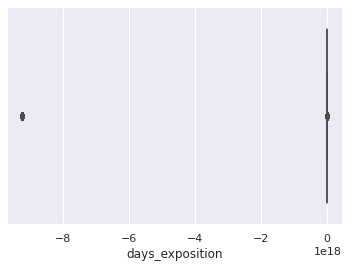

In [ ]:
# Cтроим диаграмму 'ящик с усами' для столбца  - days_exposition.
sns.boxplot(data['days_exposition'])

<AxesSubplot:xlabel='days_exposition'>

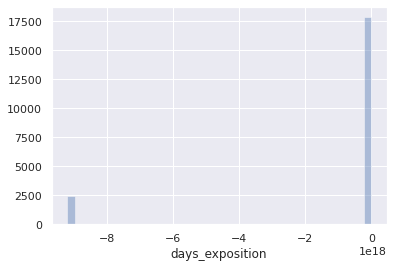

In [ ]:
# Гистограмма ниже показывает распределение 'days_exposition'
sns.distplot( a=data["days_exposition"], bins=40, hist=True, kde=False, rug=False )

In [ ]:
# удаляем отрицательные значения из столбца days_exposition.
data = data[(data['days_exposition'] >= 0) | (data['days_exposition'].isnull())]

Верхнюю границу предлагаю установить на уровне Q3+3*IQR - 727 дней.


In [ ]:
# вычисляем границы выбросов - 1.5*IQR меньше первого квартиля или на 1.5хIQR больше третьего квартиля для 
# вычисляем значение 1-го квартиля
Q1 = data['days_exposition'].quantile(q=.25)
# вычисляем значение 3-го квартиля
Q3 = data['days_exposition'].quantile(q=.75)
# вычиcляем межквартильный размах
IQR = Q3 - Q1
print('Нижняя граница "1-ый квартиль - 1,5 * IQR" = ', (Q1-1.5*IQR).round(2))
print('Верхняя граница "3-ий квартиль + 1,5 * IQR" = ', (Q3+3*IQR).round(2))

Нижняя граница "1-ый квартиль - 1,5 * IQR" =  -213.5
Верхняя граница "3-ий квартиль + 1,5 * IQR" =  727.0


In [ ]:
# считаем количество выбросов в категории верхней границы выбросов. 
print('Выбросы, находящиеся выше верхней границы дней = ', data.query('days_exposition > 727')['days_exposition'].count())

Выбросы, находящиеся выше верхней границы дней =  559


In [ ]:
# удаляем выбросы.
data.drop(index=data.query('days_exposition > 727').index,inplace=True)

<AxesSubplot:xlabel='days_exposition'>

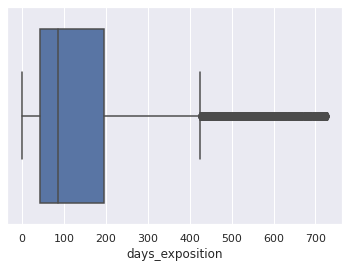

In [ ]:
# Cтроим диаграмму 'ящик с усами'
sns.boxplot(data['days_exposition'])

In [ ]:
# После удалений выбросов произведем сброс индексации
data.reset_index(drop=True, inplace=True)

In [ ]:
# выведем описательную статистику по всему датафрейму
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,17305.000000,1.730500e+04,17305.000000,17305.000000,9939.000000,17305.000000,15898.000000,17305.000000,15550.000000,17305.000000,12929.000000,12941.000000,12941.000000,5191.000000,12941.000000,6040.000000,17305.000000
mean,9.489049,4.562863e+06,50.624420,1.841895,2.653024,11.052702,28.877848,6.023172,9.238905,0.599191,29110.678397,15334.028591,0.530485,488.255827,0.673982,538.749669,144.021843
std,5.505850,1.943660e+06,15.899023,0.850859,0.164189,6.671092,11.606558,4.950376,3.047965,0.928624,13201.255634,8283.779677,0.746099,327.447476,0.863726,274.974497,151.564509
min,0.000000,4.300000e+05,13.000000,0.000000,2.200000,1.000000,9.000000,1.000000,3.200000,0.000000,0.000000,329.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.250000e+06,38.000000,1.000000,2.500000,5.000000,18.000000,2.000000,7.000000,0.000000,17792.000000,11020.000000,0.000000,289.000000,0.000000,329.000000,42.000000
50%,9.000000,4.200000e+06,47.000000,2.000000,2.600000,9.000000,28.145000,5.000000,8.900000,0.000000,27650.000000,13845.000000,0.000000,456.000000,0.000000,527.000000,85.000000
75%,13.000000,5.600000e+06,60.750000,2.000000,2.750000,16.000000,37.000000,8.000000,10.997500,1.000000,38642.000000,16802.000000,1.000000,615.500000,1.000000,746.250000,195.000000
max,39.000000,1.115000e+07,98.000000,5.000000,3.240000,60.000000,68.000000,31.000000,23.000000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,727.000000


In [ ]:
# выводим список столбцов и их типов данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17305 non-null  int64         
 1   last_price            17305 non-null  int64         
 2   total_area            17305 non-null  float64       
 3   first_day_exposition  17305 non-null  datetime64[ns]
 4   rooms                 17305 non-null  int64         
 5   ceiling_height        9939 non-null   float64       
 6   floors_total          17305 non-null  int64         
 7   living_area           15898 non-null  float64       
 8   floor                 17305 non-null  int64         
 9   is_apartment          17305 non-null  bool          
 10  studio                17305 non-null  bool          
 11  open_plan             17305 non-null  bool          
 12  kitchen_area          15550 non-null  float64       
 13  balcony         

### Выводы.
* заменили пропущенные данные в столбце balcony на 0.
* заменили пропущенные данные в столбце is_apartment на False.
* удалили строки с Null в столбцах floors_total, locality_name
* привели отобранные столбцы к целевым типам данных методами astype и pd.to_datetime
* приведем названия населенных пунктов к нижнему регистру методом str.lower().
* заменили 'ё' на 'е' методом str.replace.
* заменили 'городской поселок' на 'поселок городского типа' методом str.replace.
* для столбца "высота потолка" - ceiling_height:
1.   выбросы, находящиеся ниже нижней границы высоты потолка = 14
2.   выбросы, находящиеся выше верхней границы высоты потолка = 801
* для столбца "последняя цена" - last_price.
1.   выбросы, находящиеся ниже нижней границы цены = 1 
2.   выбросы, находящиеся выше верхней границы цены =  1862
* для столбца "общая площадь" - total_area.
1.   выбросы, находящиеся ниже нижней границы площади = 1 
2.   выбросы, находящиеся выше верхней границы площади =  397
* для столбца "жилищная площадь" - living_area.
1.   выбросы, находящиеся ниже нижней границы площади = 21 
2.   выбросы, находящиеся выше верхней границы площади =  26
* для столбца "площадь кухни" - kitchen_area.
1.   выбросы, находящиеся ниже нижней границы площади = 18 
2.   выбросы, находящиеся выше верхней границы площади =  165
* для столбца - days_exposition.
выбросы, находящиеся выше верхней границы дней =  559




### Шаг №3. Добавьте в таблицу новые столбцы.

In [ ]:
# цена одного квадратного метра.
data['price_1_m2'] = data['last_price'] / data['total_area']

In [ ]:
# день недели публикации объявления (0-понедельник, 1 - вторник и так далее).
data['day_week_exp'] = data['first_day_exposition'].dt.dayofweek

In [ ]:
# месяц публикации объявления.
data['month_exp'] = data['first_day_exposition'].dt.month

In [ ]:
# год публикации объявления
data['year_exp'] = data['first_day_exposition'].dt.year

In [ ]:
# тип этажа квартиры (значения - "первый", "последний", "другой")
data['floor_category'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

In [ ]:
# тип этажа квартиры (значения - "первый", "последний", "другой") в цифровом исполнении.
data['floor_category_int'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

In [ ]:
# расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)
data['city_centers_nearest_km'] = ((data['cityCenters_nearest'] / 1000).round(0))

In [ ]:
 # проверяем, все ли столбцы были вставлены в датафрейм.
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_1_m2,day_week_exp,month_exp,year_exp,floor_category,floor_category_int,city_centers_nearest_km
0,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0.0,NaN,81,82920.792079,1,12,2018,первый,0,19.0
1,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,1,14.0
2,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,NaN,55,95065.789474,0,9,2018,другой,1,NaN
3,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0.0,NaN,155,99195.710456,3,11,2017,другой,1,19.0
4,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,NaN,189,87454.764777,2,5,2018,другой,1,NaN
5,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289,88524.590164,6,2,2017,другой,1,15.0
6,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2.0,553.0,137,127525.252525,3,11,2017,другой,1,14.0
7,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0.0,NaN,7,75000.000000,0,8,2018,другой,1,52.0
8,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,False,...,NaN,NaN,90,72037.037037,3,6,2016,последний,2,NaN
9,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,False,...,3.0,298.0,366,82943.925234,5,7,2017,последний,2,33.0


In [ ]:
# выводим описательную статистику после вставки новых столбцов
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1_m2,day_week_exp,month_exp,year_exp,floor_category_int,city_centers_nearest_km
count,17305.000000,1.730500e+04,17305.000000,17305.000000,9939.000000,17305.000000,15898.000000,17305.000000,15550.000000,17305.000000,...,5191.000000,12941.000000,6040.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,12941.000000
mean,9.489049,4.562863e+06,50.624420,1.841895,2.653024,11.052702,28.877848,6.023172,9.238905,0.599191,...,488.255827,0.673982,538.749669,144.021843,91096.139081,2.597226,6.588038,2017.313956,1.006183,15.330114
std,5.505850,1.943660e+06,15.899023,0.850859,0.164189,6.671092,11.606558,4.950376,3.047965,0.928624,...,327.447476,0.863726,274.974497,151.564509,28369.755722,1.789983,3.486817,0.886577,0.509749,8.286251
min,0.000000,4.300000e+05,13.000000,0.000000,2.200000,1.000000,9.000000,1.000000,3.200000,0.000000,...,1.000000,0.000000,16.000000,1.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.250000e+06,38.000000,1.000000,2.500000,5.000000,18.000000,2.000000,7.000000,0.000000,...,289.000000,0.000000,329.000000,42.000000,74600.355240,1.000000,3.000000,2017.000000,1.000000,11.000000
50%,9.000000,4.200000e+06,47.000000,2.000000,2.600000,9.000000,28.145000,5.000000,8.900000,0.000000,...,456.000000,0.000000,527.000000,85.000000,91860.465116,3.000000,7.000000,2017.000000,1.000000,14.000000
75%,13.000000,5.600000e+06,60.750000,2.000000,2.750000,16.000000,37.000000,8.000000,10.997500,1.000000,...,615.500000,1.000000,746.250000,195.000000,107575.757576,4.000000,10.000000,2018.000000,1.000000,17.000000
max,39.000000,1.115000e+07,98.000000,5.000000,3.240000,60.000000,68.000000,31.000000,23.000000,5.000000,...,3190.000000,3.000000,1344.000000,727.000000,312240.000000,6.000000,12.000000,2019.000000,2.000000,65.000000


### Шаг №4. Проведите исследовательский анализ данных.

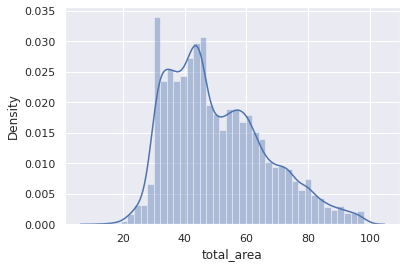

In [ ]:
# гистограмма 'total_area' - общая площадь.
sns.distplot( a=data["total_area"], bins =40, hist=True, kde=True, rug=False );

<AxesSubplot:xlabel='living_area', ylabel='Density'>

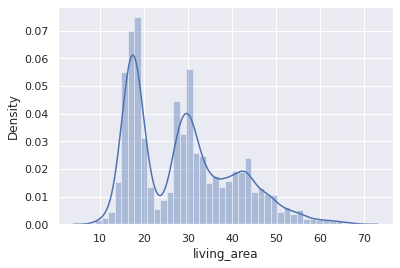

In [ ]:
# гистограмма 'living_area'
sns.distplot( a=data["living_area"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='kitchen_area', ylabel='Density'>

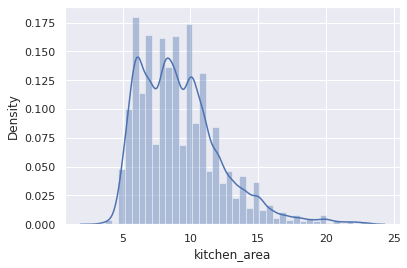

In [ ]:
# гистограмма 'kitchen_area'
sns.distplot( a=data["kitchen_area"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='last_price', ylabel='Density'>

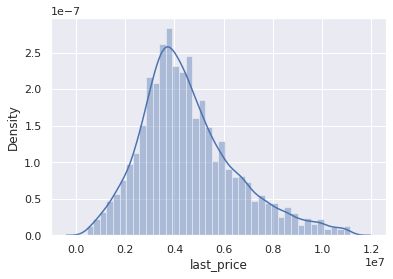

In [ ]:
# гистограмма 'last_price'
sns.distplot( a=data["last_price"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='rooms', ylabel='Density'>

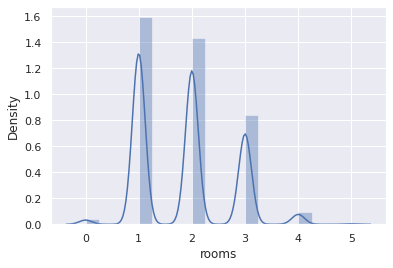

In [ ]:
# гистограмма 'rooms'
sns.distplot( a=data["rooms"], bins =20, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='ceiling_height', ylabel='Density'>

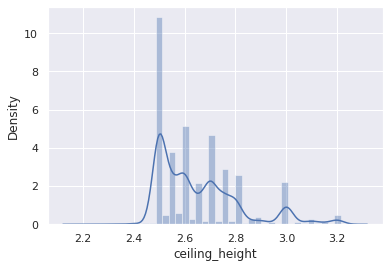

In [ ]:
# гистограмма 'ceiling_height'
sns.distplot( a=data["ceiling_height"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='floor', ylabel='Density'>

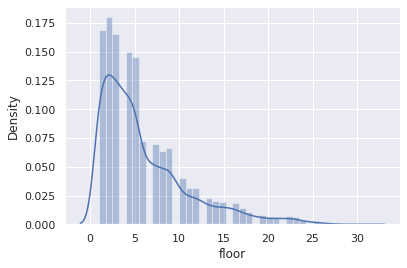

In [ ]:
# гистограмма 'floor'
sns.distplot( a=data["floor"], bins =40, hist=True, kde=True, rug=False )

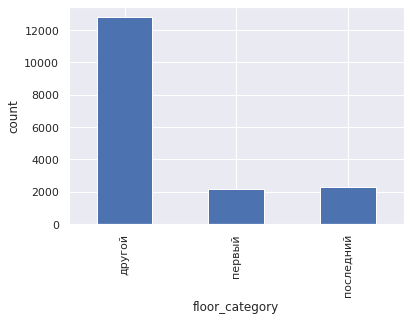

In [ ]:
# гистограмма 'floor_category'
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

<AxesSubplot:xlabel='floors_total', ylabel='Density'>

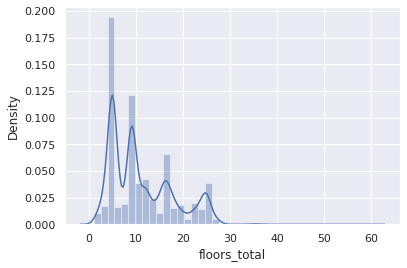

In [ ]:
# гистограмма 'floors_total'
sns.distplot( a=data["floors_total"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='Density'>

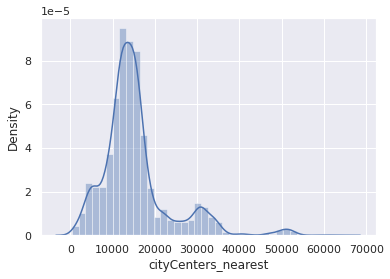

In [ ]:
# гистограмма 'cityCenters_nearest' 
sns.distplot( a=data["cityCenters_nearest"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='airports_nearest', ylabel='Density'>

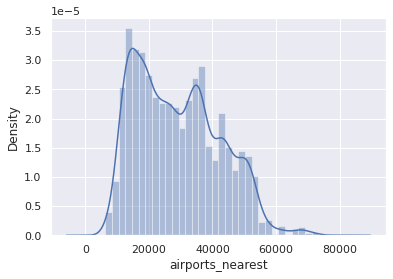

In [ ]:
# гистограмма 'airports_nearest'
sns.distplot( a=data["airports_nearest"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='parks_nearest', ylabel='Density'>

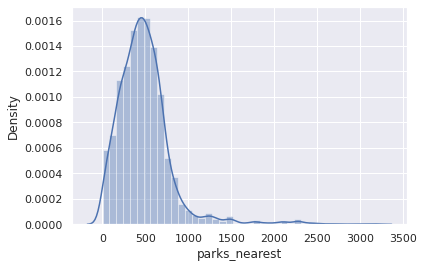

In [ ]:
# гистограмма 'parks_nearest'
sns.distplot( a=data["parks_nearest"], bins =40, hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='day_week_exp', ylabel='Density'>

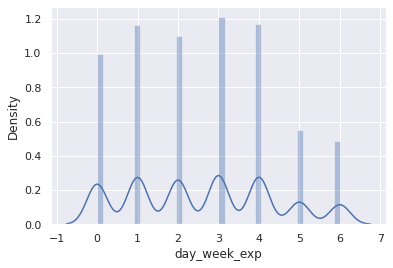

In [ ]:
# гистограмма 'day_week_exp' - танец маленьких лебедей:-)
sns.distplot( a=data["day_week_exp"], bins =40, hist=True, kde=True, rug=False)

<AxesSubplot:xlabel='month_exp', ylabel='Density'>

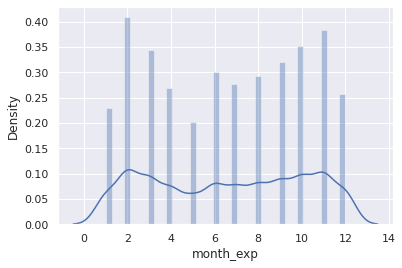

In [ ]:
# гистограмма 'month_exp'
sns.distplot( a=data["month_exp"], bins =40, hist=True, kde=True, rug=False )

#### Пояcнения к вышеприведенным гистограммам:


*   общая площадь - распределение Пуассона, медиана = 50 кв.м.
*   жилая площадь - распределение Пуассона, медиана = 29 кв.м.
*   площадь кухни - распределение Пуассона, медиана = 9.2 кв.м.
*   цена объекта - нормальное рапсределение, медиана = 4500000 руб.
*   количество комнат - распределение Пуассона, медиана = 2
*   высота потолков - распределение Пуассона, медиана = 2.64
*   этаж квартиры - распределение Пуассона, медиана = 5
*   тип этажа квартиры - распределение Пуассона 
*   общее количество этажей в доме - распределение Пуассона, медиана = 9 
*   расстояние до центра города в метрах - распределение Пуассона, медиана 14000 м 
*   расстояние до ближайшего аэропорта - распределение Пуассона, медиана = 28036 м
*   расстояние до ближайшего парка - распределение Пуассона, медиана = 458 м.
*   день публикации объявления - равномерное распределение, медиана = 3
*   месяц публикации объявления - равномерное распределение, медиана = 6
  















#### Анализ скорости продажи квартир на основании количества дней сколько объявление о продаже было размещено.

In [ ]:
# описательная статистика по столбцу 'days_exposition'
data['days_exposition'].describe()

count    17305.000000
mean       144.021843
std        151.564509
min          1.000000
25%         42.000000
50%         85.000000
75%        195.000000
max        727.000000
Name: days_exposition, dtype: float64

In [ ]:
print('количество квартир, продающихся менее 25% 1-квантиля = ', data.query('days_exposition < 42')['days_exposition'].count())
print('количество квартир, продающихся больше 75% 3-квантиля = ', data.query('days_exposition > 195')['days_exposition'].count())

количество квартир, продающихся менее 25% 1-квантиля =  4312
количество квартир, продающихся больше 75% 3-квантиля =  4320


### Выводы.
* В среднем продажа квартиры занимает = 144.02 дней;
* Медиана = 85 дня.
* Среднее превышает медиану в 1,69 раза.
* квартиры, находящиеся в 1-ом квантиле (25%) или 4312 сделок - продаются за 42 дня (самые быстрые продажи).
* квартиры, находящиеся за пределами 3 квантиля >75% - 4320 сделок продаются более чем за 195 дней (самые долгие продажи).
* гистограмма характерна для пуассоновского распределения.



<AxesSubplot:xlabel='days_exposition', ylabel='Density'>

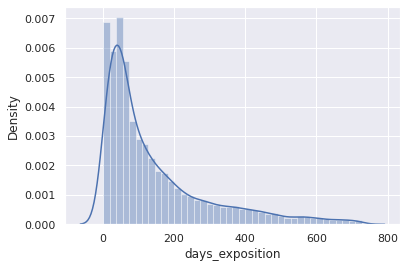

In [ ]:
# гистограмма 'days_exposition'
sns.distplot( a=data["days_exposition"], bins =40, hist=True, kde=True, rug=False )

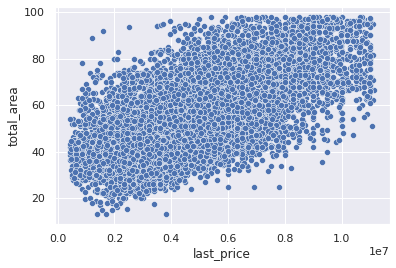

In [ ]:
# Сгенерируем диаграмму рассеяния, показывающую взаимосвязь между ценой и общей площадью.
sns.scatterplot(x="last_price", y="total_area", data=data);

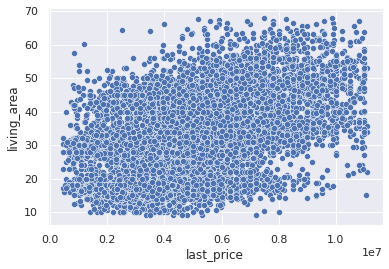

In [ ]:
# Сгенерируем диаграмму рассеяния, показывающую взаимосвязь между ценой и жилой площадью.
sns.scatterplot(x="last_price", y="living_area", data=data);

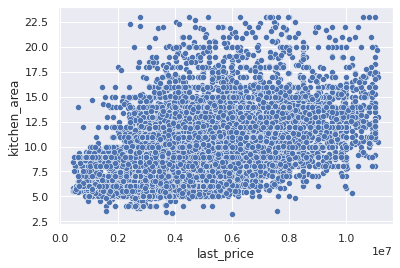

In [ ]:
# Сгенерируем диаграмму рассеяния, показывающую взаимосвязь между ценой и площадью кухни.
sns.scatterplot(x="last_price", y="kitchen_area", data=data);

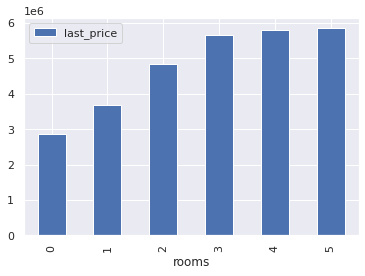

In [ ]:
# построим столбчатый график для комнат и цен.
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

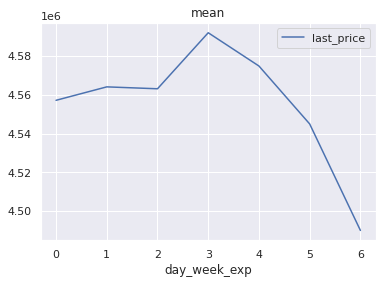

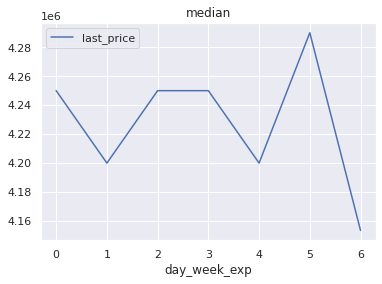

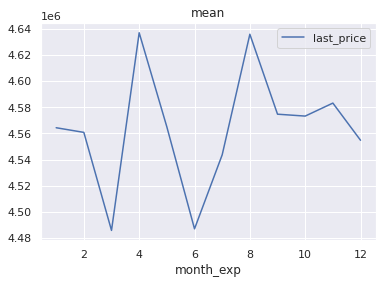

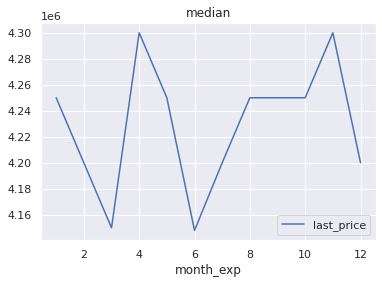

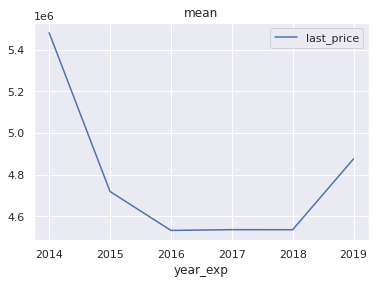

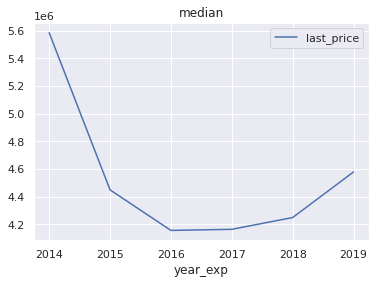

In [ ]:
# выведем линейные графики для дней в зависимости от цены
data.pivot_table(index='day_week_exp',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='day_week_exp',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
# выведем линейные графики для месяца в зависимости от цены.
data.pivot_table(index='month_exp',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month_exp',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
# выведем линейные графики для года в зависимости от цены.
data.pivot_table(index='year_exp',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year_exp',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

### Вывод:

* диаграмма рассеяния между ценой и общей площадью - с ростом общей площади растет и цена;
* диаграмма рассеяния между ценой и жилой площадью - с ростом жилой площади растет и цена;
* диаграмма рассеяния между ценой и площадью кухни - с ростом площади кухни растет и цена;
* столбчатый график между ценой и количеством комнат - с увеличением числа комнат растет цена;
* линейный график между ценой и днями - максимум среднего значения цены приходится на среду, в выходные падает;
* линейный график между ценой и месяцами - максимальные средние цены наблюдаются в апреле и августе, минимум - в марте и июне;
* линейный график между ценой и годом - график напоминает "ковш" - с 2014 года началось падание средних цен вплоть до 2017 года, далее наблюдаем плавный подъем средних цен.


####Определение средней цены одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений.

In [ ]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
top_ad = data['locality_name'].value_counts().head(10)
top_price_m2 = data.query('locality_name in (@top_ad.index)').pivot_table(values='price_1_m2', index='locality_name')
top_price_m2 = top_price_m2.astype(int)
top10 = top_price_m2.sort_values('price_1_m2', ascending=False)
print(top10)

                   price_1_m2
locality_name                
Санкт-Петербург        104105
Пушкин                  99098
деревня Кудрово         92736
поселок Парголово       89696
поселок Мурино          85685
поселок Шушары          77920
Колпино                 74733
Гатчина                 68103
Всеволожск              66664
Выборг                  57483


<AxesSubplot:ylabel='locality_name'>

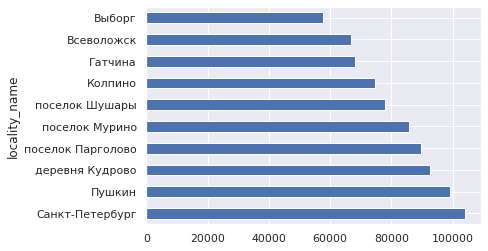

In [ ]:
# гистограмма 'days_exposition'
top10['price_1_m2'].plot(kind='barh')

#### Вывод.
* самая дорогая недвижимость в Санкт-Петербурге.
* самая дешевая из списка top10 - в Всеволожске.
* чем больше расстояние от Санкт-Петербурга тем стоимость 1 квадратного метра недвижимости меньше.

#### Вычисление средней цены каждого километра для Санкт-Петербурга.

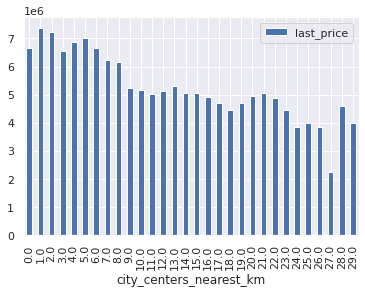

In [ ]:
flat_spb = data.query('locality_name == "Санкт-Петербург"')
flat_spb.pivot_table(index = 'city_centers_nearest_km',values='last_price').plot(y='last_price', kind='bar');

#### Вывод. С ростом расстояния от центра Санкт-Петербурга средняя стоимость недвижимости падает.

### Шаг №5. Общий вывод.
* в наибольшей степени цена недвижимости коррелирует с общей и жилой площадью, менее с количеством комнат и площадью кухни. Практически нет корреляции между ценой за недвижимость и категориями этажей, а также отсутствует корреляция с днями, месяцами и годами.
* подавляющее число гистограмм показывают пуассоновское распределение, за исключением гистограммы цены за недвижимость, где она подчиняется нормальному распределению и гистограмм равномерного распределения в случае дней и месяцев.
* чем больше расстояние от Санкт-Петербурга тем стоимость 1 квадратного метра недвижимости меньше.
* С ростом расстояния от центра Санкт-Петербурга средняя стоимость недвижимости за километр падает.
* В среднем продажа квартиры занимает = 114 дней;
* Медиана = 85 дня.
* квартиры, находящиеся в 1-ом квантиле (25%) или 4312 сделок - продаются за 42 дня (самые быстрые продажи).
* квартиры, находящиеся за пределами 3 квантиля >75% - 4320 сделок продаются более чем за 195 дня (самые долгие продажи).
